# Lab 5 - Joining Uber Pick-Ups, Stations, and Boroughs

In [Lecture 3.4](./3_4_joining_large_and_small_files.ipynb), we introduced using a Python `dict` to join a large and small table.  In this lab, we will practice this technique on the uber data set.

**Note:** Make sure that you download and unzip the file `Uber-Jan-Feb-FOIL.csv` before proceeding.

In [1]:
from toolz import first
import numpy as np
import pandas as pd
from dfply import *

In [2]:
c_size = 500000
date_cols = ['Pickup_date']
trips = pd.read_csv("./data/uber/uber-trip-data/uber-raw-data-janjune-15.csv/uber-raw-data-janjune-15.csv",
                    parse_dates = date_cols,
                    chunksize=c_size)
first_chunk = next(trips)

In [3]:
first_chunk.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


## <font color="red"> Problem 1 - Creating 2 Location `dict`</font>

Read the file `taxi-zone-lookup.csv` and inspect the columns. What 2 pieces of information will this file allow us to add to the `uber-raw-data-janjune-15.csv`?  Make a `dict` for each of these variables.

The 2 pieces of information that will allow us to add to uber raw data are the LocationID and Borough columns from taxi zone

In [4]:
look_up = pd.read_csv('./data/uber/uber-trip-data/taxi-zone-lookup.csv')
look_up.head()

,LocationID,Borough,Zone
0,1,EWR,Newark Airport
1,2,Queens,Jamaica Bay
2,3,Bronx,Allerton/Pelham Gardens
3,4,Manhattan,Alphabet City
4,5,Staten Island,Arden Heights


In [5]:
borough= {ID:name for ID, name in zip(look_up.LocationID, look_up.Borough)}
borough

{1: 'EWR',
 2: 'Queens',
 3: 'Bronx',
 4: 'Manhattan',
 5: 'Staten Island',
 6: 'Staten Island',
 7: 'Queens',
 8: 'Queens',
 9: 'Queens',
 10: 'Queens',
 11: 'Brooklyn',
 12: 'Manhattan',
 13: 'Manhattan',
 14: 'Brooklyn',
 15: 'Queens',
 16: 'Queens',
 17: 'Brooklyn',
 18: 'Bronx',
 19: 'Queens',
 20: 'Bronx',
 21: 'Brooklyn',
 22: 'Brooklyn',
 23: 'Staten Island',
 24: 'Manhattan',
 25: 'Brooklyn',
 26: 'Brooklyn',
 27: 'Queens',
 28: 'Queens',
 29: 'Brooklyn',
 30: 'Queens',
 31: 'Bronx',
 32: 'Bronx',
 33: 'Brooklyn',
 34: 'Brooklyn',
 35: 'Brooklyn',
 36: 'Brooklyn',
 37: 'Brooklyn',
 38: 'Queens',
 39: 'Brooklyn',
 40: 'Brooklyn',
 41: 'Manhattan',
 42: 'Manhattan',
 43: 'Manhattan',
 44: 'Staten Island',
 45: 'Manhattan',
 46: 'Bronx',
 47: 'Bronx',
 48: 'Manhattan',
 49: 'Brooklyn',
 50: 'Manhattan',
 51: 'Bronx',
 52: 'Brooklyn',
 53: 'Queens',
 54: 'Brooklyn',
 55: 'Brooklyn',
 56: 'Queens',
 57: 'Queens',
 58: 'Bronx',
 59: 'Bronx',
 60: 'Bronx',
 61: 'Brooklyn',
 62: 'Broo

In [6]:
zone = {ID:name for ID, name in zip(look_up.LocationID, look_up.Zone)}
zone

{1: 'Newark Airport',
 2: 'Jamaica Bay',
 3: 'Allerton/Pelham Gardens',
 4: 'Alphabet City',
 5: 'Arden Heights',
 6: 'Arrochar/Fort Wadsworth',
 7: 'Astoria',
 8: 'Astoria Park',
 9: 'Auburndale',
 10: 'Baisley Park',
 11: 'Bath Beach',
 12: 'Battery Park',
 13: 'Battery Park City',
 14: 'Bay Ridge',
 15: 'Bay Terrace/Fort Totten',
 16: 'Bayside',
 17: 'Bedford',
 18: 'Bedford Park',
 19: 'Bellerose',
 20: 'Belmont',
 21: 'Bensonhurst East',
 22: 'Bensonhurst West',
 23: 'Bloomfield/Emerson Hill',
 24: 'Bloomingdale',
 25: 'Boerum Hill',
 26: 'Borough Park',
 27: 'Breezy Point/Fort Tilden/Riis Beach',
 28: 'Briarwood/Jamaica Hills',
 29: 'Brighton Beach',
 30: 'Broad Channel',
 31: 'Bronx Park',
 32: 'Bronxdale',
 33: 'Brooklyn Heights',
 34: 'Brooklyn Navy Yard',
 35: 'Brownsville',
 36: 'Bushwick North',
 37: 'Bushwick South',
 38: 'Cambria Heights',
 39: 'Canarsie',
 40: 'Carroll Gardens',
 41: 'Central Harlem',
 42: 'Central Harlem North',
 43: 'Central Park',
 44: 'Charleston/Tot

## <font color="red"> Problem 2 - Dispatch Translation</font>

The following table was taken from the FiveThirtyEight github page and contains the names of each Uber dispatch station.  Create a translation `dict` for these data.

Base Code | Base Name
---|---------
B02512 | Unter
B02598 | Hinter
B02617 | Weiter
B02682 | Schmecken
B02764 | Danach-NY
B02765 | Grun
B02835 | Dreist
B02836 | Drinnen

In [7]:
BASE_NAME = {'B02512': 'Unter',
        'B02598' : 'Hinter',
        'B02617' : 'Weiter',
        'B02682' : 'Schmecken',
        'B02764' : 'Danach-NY',
        'B02765' : 'Grun',
        'B02835' : 'Dreist',
        'B02836' : 'Drinnen'}
BASE_NAME

{'B02512': 'Unter',
 'B02598': 'Hinter',
 'B02617': 'Weiter',
 'B02682': 'Schmecken',
 'B02764': 'Danach-NY',
 'B02765': 'Grun',
 'B02835': 'Dreist',
 'B02836': 'Drinnen'}

## <font color="red"> Problem 3 - Prototyping a Helper Function</font>

Use the first chunk to prototype a helper function that

1. Add three new columns, one for each key/translation.
2. Drop each of the associated keys.
3. Convert the `pickup_date` to a datetime column.
4. Add various datepart columns

This function should use appropriate `dfply` functions and a pipe.

In [8]:
borough = {ID:name for ID, name in zip(look_up.LocationID, look_up.Borough)}

In [9]:
first_chunk.Dispatching_base_num.map(BASE_NAME).head()

0    Weiter
1    Weiter
2    Weiter
3    Weiter
4    Weiter
Name: Dispatching_base_num, dtype: object

In [10]:
first_chunk.locationID.map(borough).head()

0    Manhattan
1     Brooklyn
2    Manhattan
3     Brooklyn
4    Manhattan
Name: locationID, dtype: object

In [11]:
first_chunk.locationID.map(zone).head()

0                Lenox Hill West
1    Downtown Brooklyn/MetroTech
2               Garment District
3              East Williamsburg
4                       Flatiron
Name: locationID, dtype: object

In [12]:
first_chunk.columns

Index(['Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num',
       'locationID'],
      dtype='object')

In [13]:
(first_chunk
 >>mutate(base_name = X.Dispatching_base_num.replace(to_replace=BASE_NAME),
          borough_name = X.locationID.replace(to_replace=borough),
          zone_name = X.locationID.replace(to_replace=borough),
          weekday = X.Pickup_date.dt.weekday_name,
          day = X.Pickup_date.dt.day,
          hour = X.Pickup_date.dt.hour)
 >>drop(X.Dispatching_base_num,
        X.Affiliated_base_num,
        X.locationID)
 >>head)

,Pickup_date,base_name,borough_name,zone_name,weekday,day,hour
0,2015-05-17 09:47:00,Weiter,Manhattan,Manhattan,Sunday,17,9
1,2015-05-17 09:47:00,Weiter,Brooklyn,Brooklyn,Sunday,17,9
2,2015-05-17 09:47:00,Weiter,Manhattan,Manhattan,Sunday,17,9
3,2015-05-17 09:47:00,Weiter,Brooklyn,Brooklyn,Sunday,17,9
4,2015-05-17 09:47:00,Weiter,Manhattan,Manhattan,Sunday,17,9


In [15]:
from functoolz import pipeable
add_base_bor_zone_dateparts = pipeable(lambda df: (df
                               >> mutate(base_name = X.Dispatching_base_num.replace(to_replace=BASE_NAME),
                                         borough_name = X.locationID.replace(to_replace=borough),
                                         zone_name = X.locationID.replace(to_replace=borough),
                                         weekday = X.Pickup_date.dt.weekday_name,
                                         day = X.Pickup_date.dt.day,
                                         hour = X.Pickup_date.dt.hour)
                               >>drop(X.Dispatching_base_num,
                                      X.Affiliated_base_num,
                                      X.locationID)))
processed_first_chunk = first_chunk >> add_base_bor_zone_dateparts
processed_first_chunk.head(2)

,Pickup_date,base_name,borough_name,zone_name,weekday,day,hour
0,2015-05-17 09:47:00,Weiter,Manhattan,Manhattan,Sunday,17,9
1,2015-05-17 09:47:00,Weiter,Brooklyn,Brooklyn,Sunday,17,9


## <font color="red"> Problem 4 - Creating a SQL database</font>

Use `pandas` and your helper function to create a `sqlite` database for this file.

In [16]:
add_primary_key = pipeable(lambda start, df: (df
                                              >> mutate(id = np.arange(start, start + len(df))
                                              )))

In [17]:
from dfply import head
i = 0
(first_chunk >> add_base_bor_zone_dateparts 
 >> add_primary_key(i*c_size) 
 >> head(1))

,Pickup_date,base_name,borough_name,zone_name,weekday,day,hour,id
0,2015-05-17 09:47:00,Weiter,Manhattan,Manhattan,Sunday,17,9,0


In [18]:
process_chunk = pipeable(lambda i, df, chunksize=c_size: df >> add_base_bor_zone_dateparts >> add_primary_key(i*c_size))
first_chunk >> process_chunk(0) >> tail(1)

,Pickup_date,base_name,borough_name,zone_name,weekday,day,hour,id
499999,2015-05-21 09:39:00,Danach-NY,Manhattan,Manhattan,Thursday,21,9,499999


In [19]:
from more_sqlalchemy import get_sql_types
i = 0
complete_first_chunk = first_chunk >> process_chunk(i)
sql_types = get_sql_types(complete_first_chunk)
sql_types

{'Pickup_date': sqlalchemy.sql.sqltypes.DateTime,
 'base_name': sqlalchemy.sql.sqltypes.String,
 'borough_name': sqlalchemy.sql.sqltypes.String,
 'zone_name': sqlalchemy.sql.sqltypes.String,
 'weekday': sqlalchemy.sql.sqltypes.String,
 'day': sqlalchemy.sql.sqltypes.Integer,
 'hour': sqlalchemy.sql.sqltypes.Integer,
 'id': sqlalchemy.sql.sqltypes.Integer}

In [20]:
!rm ./databases/uber_lookup.db

In [21]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///databases/uber_lookup.db', echo=False)

In [22]:
schema = pd.io.sql.get_schema(complete_first_chunk,
                              'uber_lookup',
                              keys='id',
                              con=engine,
                              dtype=sql_types)
print(schema)
engine.execute(schema)


CREATE TABLE uber_lookup (
	"Pickup_date" DATETIME, 
	base_name VARCHAR, 
	borough_name VARCHAR, 
	zone_name VARCHAR, 
	weekday VARCHAR, 
	day INTEGER, 
	hour INTEGER, 
	id INTEGER NOT NULL, 
	CONSTRAINT uber_lookup_pk PRIMARY KEY (id)
)




In [23]:
c_size = 500000
date_cols = ['Pickup_date']
df_iter = enumerate(pd.read_csv("./data/uber/uber-trip-data/uber-raw-data-janjune-15.csv/uber-raw-data-janjune-15.csv", 
                                header=0, 
                                parse_dates=date_cols,
                                chunksize=c_size,
                                sep=',',
                                engine='python'))

In [24]:
for i, chunk in df_iter:
    processed_chunk = chunk >> process_chunk(i)
    print('writing chunk {0}'.format(i))
    processed_chunk.to_sql('uber_lookup', 
                           con=engine, 
                           dtype=sql_types, 
                           index=False,
                           if_exists='append')

writing chunk 0
writing chunk 1
writing chunk 2
writing chunk 3
writing chunk 4
writing chunk 5
writing chunk 6
writing chunk 7
writing chunk 8
writing chunk 9
writing chunk 10
writing chunk 11
writing chunk 12
writing chunk 13
writing chunk 14
writing chunk 15
writing chunk 16
writing chunk 17
writing chunk 18
writing chunk 19
writing chunk 20
writing chunk 21
writing chunk 22
writing chunk 23
writing chunk 24
writing chunk 25
writing chunk 26
writing chunk 27
writing chunk 28


## <font color="red"> Problem 5 - Exploring the pickups</font>

**Question of Interest:** I am interested in difference between pick-ups in terms of both time and Borough.  Use aggregation and visualizations to construct a group that illustrates an interesting difference between the Boroughs.

In [25]:
from sqlalchemy import create_engine
from sqlalchemy.ext.automap import automap_base
engine2 = create_engine('sqlite:///databases/uber_lookup.db')
Base = automap_base()
Base.prepare(engine2, reflect=True)
Uber = Base.classes.uber_lookup

In [47]:
from sqlalchemy import select, func
stmt = (select([Uber.hour, Uber.borough_name,
               func.count(Uber.hour).label('total hourly count')])
        .filter_by(Uber.borough_name = '')
        .group_by(Uber.borough_name))
cnts = pd.read_sql_query(stmt, con=engine2)
cnts

,hour,borough_name,total hourly count
0,15,Bronx,220146
1,15,Brooklyn,2322000
2,6,EWR,105
3,15,Manhattan,10371060
4,15,Queens,1343945
5,17,Staten Island,6959
6,14,Unknown,6264


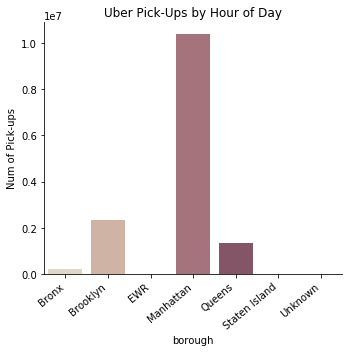

In [48]:
import seaborn as sns
%matplotlib inline
import matplotlib.pylab as plt
ax = (sns
      .catplot(x="borough_name", 
               y = 'total hourly count',
               kind="bar",
               palette="ch:.25", 
               data=cnts))

ax.set_xticklabels(ax.ax.get_xticklabels(), rotation=40, ha="right")
ax.set(title='Uber Pick-Ups by Hour of Day',
       xlabel='borough', 
       ylabel='Num of Pick-ups')
plt.tight_layout()
plt.show()